### u1421126
#### Recommender Systems with Python

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
%matplotlib inline

In [95]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [96]:
df.head()

,user_id,item_id,rating,timestamp
0,9438161,NaN,NaN,NaN
1,332,222.0,4.0,887916529.0
2,551,735.0,5.0,892783110.0
3,13,160.0,4.0,882140070.0
4,532,946.0,5.0,888635366.0


* Movie titles:

In [97]:
movie_titles = pd.read_csv("Movie_Id_Titles.txt")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


* Merging them together:

In [98]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,332,222.0,4.0,887916529.0,Star Trek: First Contact (1996)
1,717,222.0,4.0,884642215.0,Star Trek: First Contact (1996)
2,664,222.0,3.0,876524641.0,Star Trek: First Contact (1996)
3,749,222.0,3.0,878847716.0,Star Trek: First Contact (1996)
4,323,222.0,3.0,878739251.0,Star Trek: First Contact (1996)


#### EDA
**Visualization Imports**

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

* Creating ratings dataframe with average rating and number of ratings:

In [100]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Fresh (1994)                             5.0
Crossfire (1947)                         5.0
Little City (1998)                       5.0
Visitors, The (Visiteurs, Les) (1993)    5.0
They Made Me a Criminal (1939)           5.0
Name: rating, dtype: float64

In [101]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)               299
Liar Liar (1997)               260
Return of the Jedi (1983)      259
English Patient, The (1996)    255
Fargo (1996)                   255
Name: rating, dtype: int64

In [102]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.666667
101 Dalmatians (1996),2.877193
12 Angry Men (1957),4.360656
187 (1997),3.130435


* Setting the number of ratings column:

In [103]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,3
1-900 (1994),2.666667,3
101 Dalmatians (1996),2.877193,57
12 Angry Men (1957),4.360656,61
187 (1997),3.130435,23


* Creating histograms:

<AxesSubplot:>

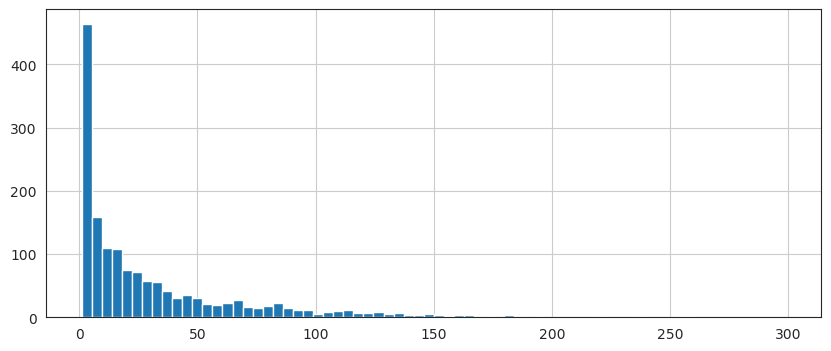

In [104]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

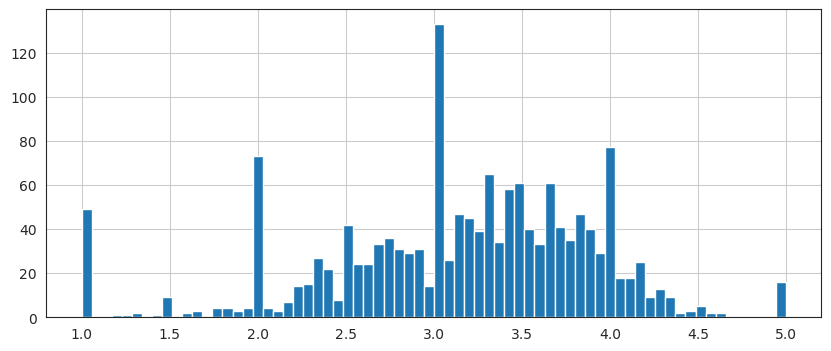

In [105]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

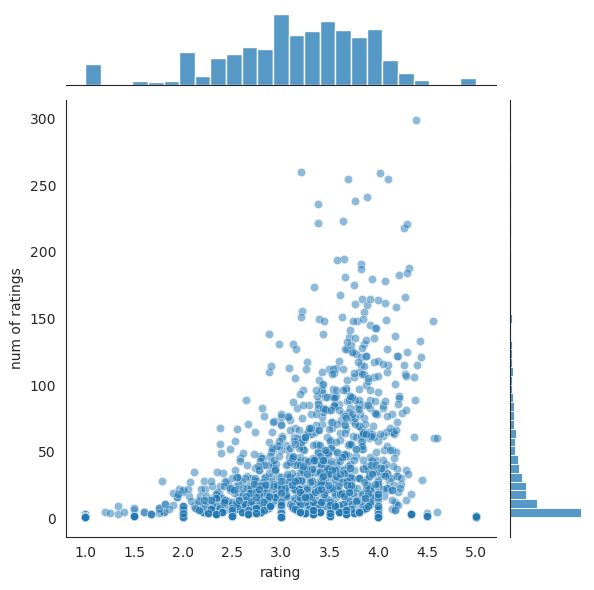

In [106]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

#### Recommending Similar Movies

In [107]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* These are the most rated movies: 

In [108]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.384615,299
Liar Liar (1997),3.211538,260
Return of the Jedi (1983),4.015444,259
"English Patient, The (1996)",3.686275,255
Fargo (1996),4.101961,255
Toy Story (1995),3.887967,241
Contact (1997),3.756303,238
Independence Day (ID4) (1996),3.381356,236
Air Force One (1997),3.636771,223


* Now let's choose two movies: Starwars, a sci-fi movie, and Liar Liar, that is a comedy 

In [109]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,3
1-900 (1994),2.666667,3
101 Dalmatians (1996),2.877193,57
12 Angry Men (1957),4.360656,61
187 (1997),3.130435,23


* These are the user ratings for those two movies:

In [110]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Star Wars (1977), dtype: float64

* Cleaning this by removing NaN values and using a DataFrame instead of a series:

In [111]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
101 Dalmatians (1996),0.193936
12 Angry Men (1957),0.188129
187 (1997),-0.218218
2 Days in the Valley (1996),0.065779
"20,000 Leagues Under the Sea (1954)",0.200000


In [112]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Dream With the Fishes (1997),1.0
"Low Down Dirty Shame, A (1994)",1.0
All Dogs Go to Heaven 2 (1996),1.0
Love Serenade (1996),1.0
Star Wars (1977),1.0
Trust (1990),1.0
Kansas City (1996),1.0
"Pest, The (1997)",1.0
Children of the Revolution (1996),1.0


In [113]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
101 Dalmatians (1996),0.193936,57
12 Angry Men (1957),0.188129,61
187 (1997),-0.218218,23
2 Days in the Valley (1996),0.065779,54
"20,000 Leagues Under the Sea (1954)",0.200000,41


* Sorting the values:

In [114]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,299
"Empire Strikes Back, The (1980)",0.622195,188
Return of the Jedi (1983),0.558921,259
Raiders of the Lost Ark (1981),0.506451,221
Tomorrow Never Dies (1997),0.492095,101


* Same for comedy Liar Liar:

In [115]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,260
Sleepless in Seattle (1993),0.498420,112
"Shawshank Redemption, The (1994)",0.485313,133
Chasing Amy (1997),0.483138,191
In & Out (1997),0.437710,117
